In [1]:
# Stop warnings
import warnings
warnings.filterwarnings("ignore")

# Imports
import os
import sys
import cortex
import numpy as np

# Personal imports
sys.path.append("{}/../../../utils".format(os.getcwd()))
from pycortex_utils import draw_cortex, set_pycortex_config_file, load_surface_pycortex, create_colormap, get_rois
from surface_utils import load_surface

In [3]:
# Directories
main_dir = '/home/mszinte/disks/meso_S/data'
project_dir = 'RetinoMaps'

In [4]:
# Set pycortex db and colormaps
cortex_dir = "{}/{}/derivatives/pp_data/cortex".format(main_dir, project_dir)
set_pycortex_config_file(cortex_dir)

# Webgl port
port_num = 25000

# Load data

In [5]:
# Settings 
subject = 'sub-01'

In [7]:
# Directories
data_L_fn = '{}_ses-01_task-rest_space-fsLR_den-170k_desc-full_corr_fisher-z_fdr_alpha1_L.shape.gii'.format(subject)
data_R_fn = '{}_ses-01_task-rest_space-fsLR_den-170k_desc-full_corr_fisher-z_fdr_alpha1_R.shape.gii'.format(subject)


In [8]:
# Load data
img_L, data_L = load_surface(fn=data_L_fn)
img_R, data_R = load_surface(fn=data_L_fn)

In [9]:
# concat data 


# Plot data 

In [21]:
pycortex_subject = 'sub-170k'
data_brain = np.concatenate([data_L, data_R], axis=1)
index2plot = 0
data2plot = data_brain[index2plot, :]
colormap_name = 'BuWtRd' 
save_svg = False
vmin = -0.4
vmax = 0.4
alpha_range = [0, 0.4]
alpha_data = np.abs(data_brain[index2plot, :])
alpha = alpha_data
alpha = (alpha - alpha_range[0]) / (alpha_range[1] - alpha_range[0])
alpha[alpha>1]=1
roi_name = 'XXX'

Color map BuWtRd is already registered.
Unable to init server: Could not connect: Connection refused
Failed to get connection
** (inkscape:3420278): CRITICAL **: 18:51:20.620: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed
** (inkscape:3420278): CRITICAL **: 18:51:20.620: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed
** (inkscape:3420278): CRITICAL **: 18:51:20.620: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed
** (inkscape:3420278): WARNING **: 18:51:20.814: Fonts dir '/usr/share/inkscape/fonts' does not exist and will be ignored.
** (inkscape:3420278): WARNING **: 18:51:20.814: Fonts dir '/home/mszinte/.config/inkscape/fonts' does not exist and will be ignored.
** (inkscape:3420278): WARNING **: 18:51:21.041: attribute 'clip-path' given as CSS
** (inkscape:3420278): WARNING **: 18:51:21.041: attribute 'clip-path' given as CSS
** (inkscape:3420278): WARNING **: 18:51:21.041: attribute 'clip-path' given as CSS
** (inkscape:

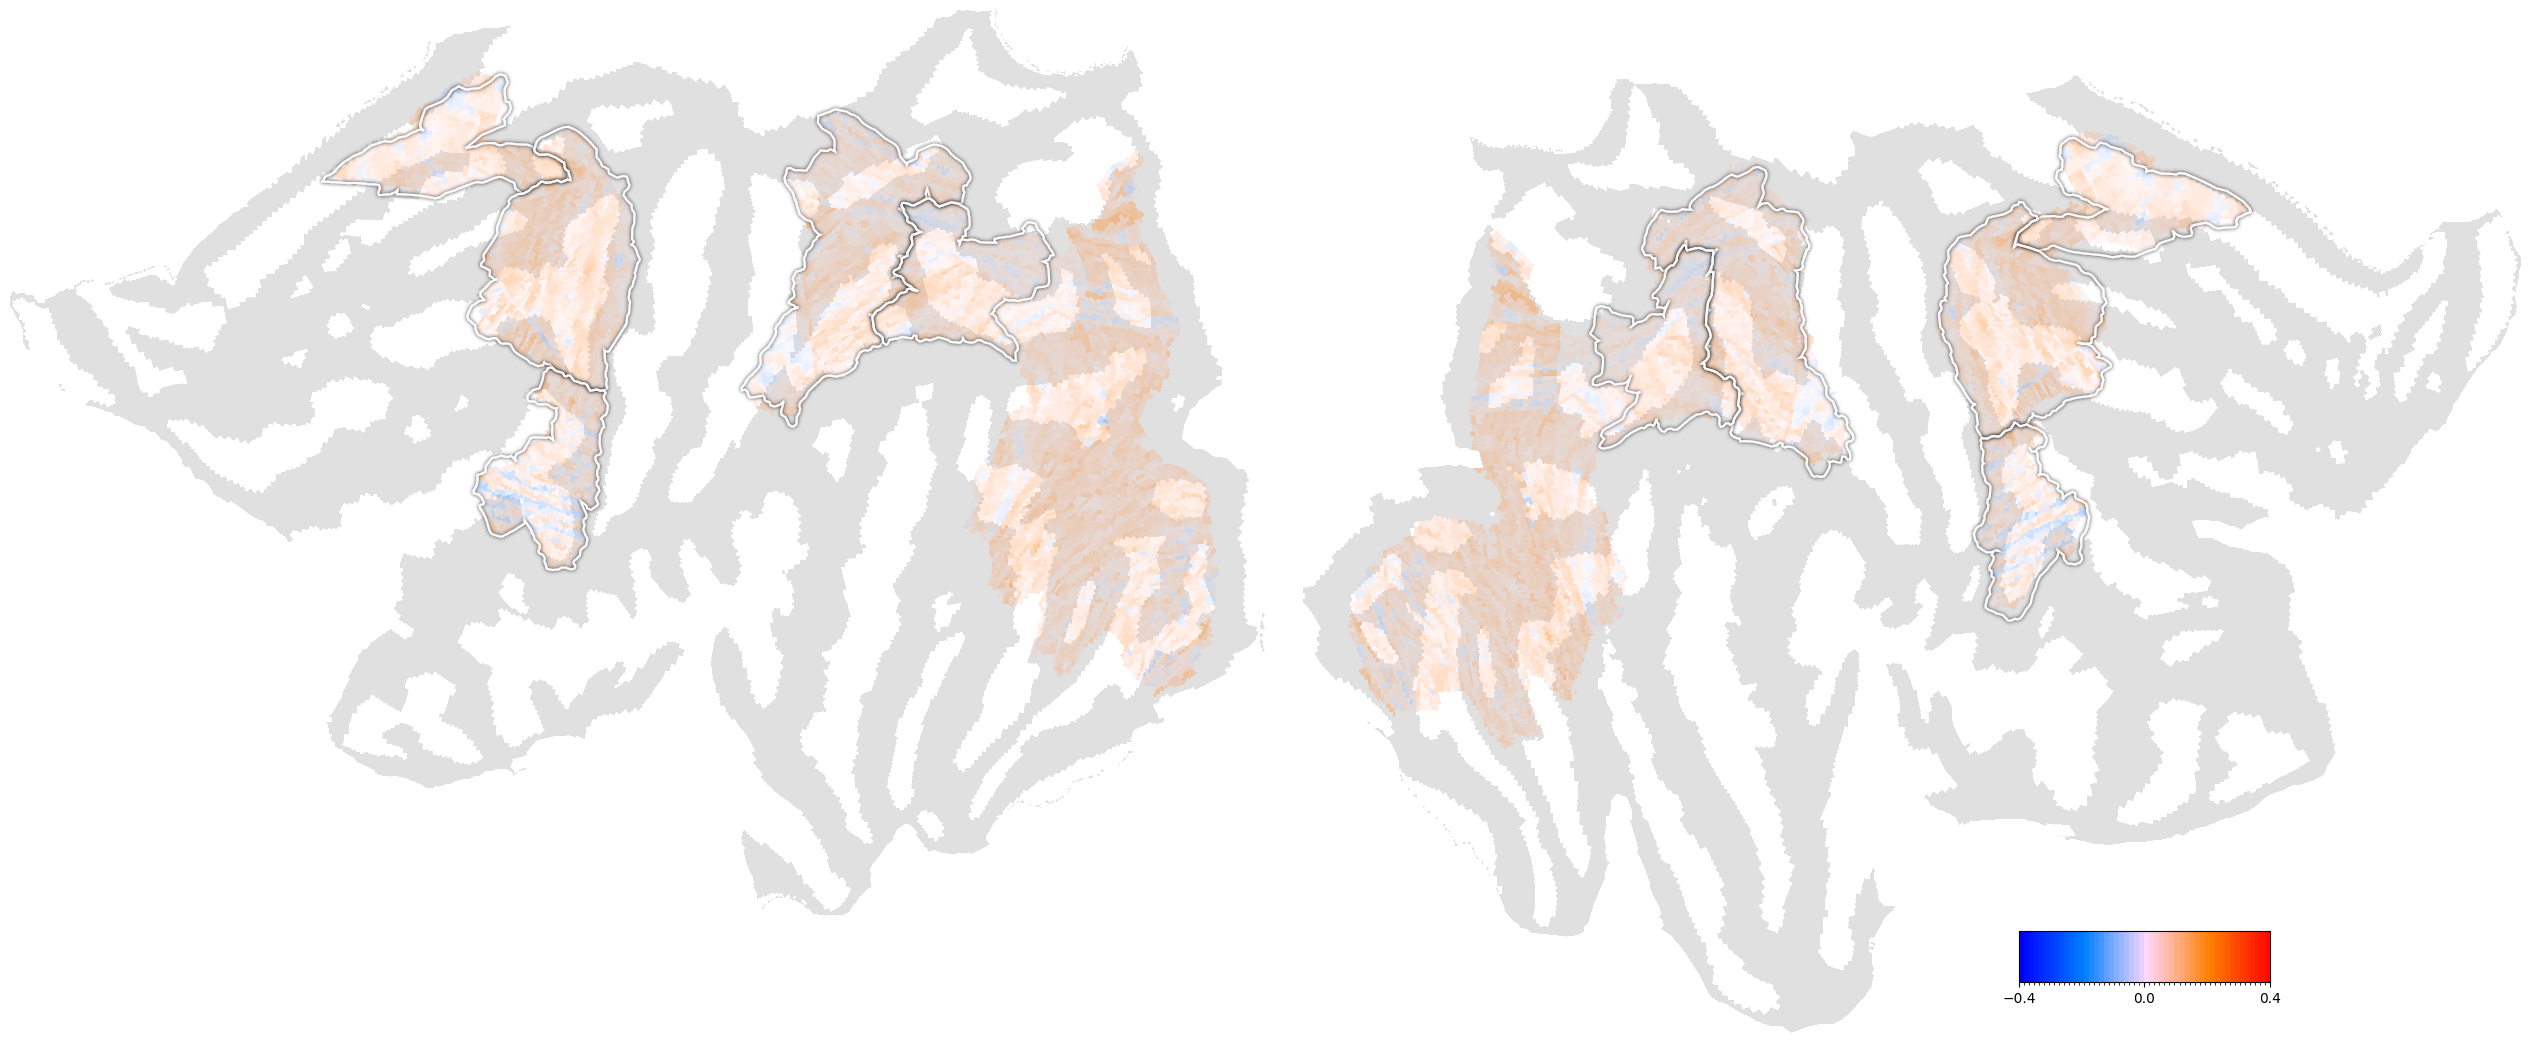

In [22]:
param_rois = {'subject': pycortex_subject,
              'data': data2plot,
              'cmap': colormap_name,
              'alpha': alpha,
              'cbar': 'discrete', 
              'vmin': vmin,
              'vmax': vmax,
              'cmap_steps': 50,
              'cortex_type': 'VertexRGB',
              'description': 'NAME',
              'curv_brightness': 1, 
              'curv_contrast': 0.25,
              'add_roi': save_svg,
              'with_labels': False,
              'roi_name': roi_name}

volume_roi = draw_cortex(**param_rois)

# fig_dir = '/Users/uriel/Downloads'
# plt.savefig('{}/FIG_name.pdf'.format(fig_dir))

# WebGL

In [31]:
port_num = port_num + 1

# Remome overlays_visible=('sulci','roi'), to have borders 
print("Go to (in 5 s...): http://localhost:{}/".format(port_num))
handle = cortex.webgl.show(data=volume_roi,
                           recache=True,
                           port=port_num,
                           overlays_visible=('rois', 'sulci'), # Border to plots possible value 'roi', 'sulcis'
                           labels_visible=() # Labels to plot, possible value'roi', 'sulcis'
                          )

Go to (in 5 s...): http://localhost:25004/
Generating new ctm file...
wm
wm
inflated
inflated
Started server on port 25004
Stopping server
Stopping server
Stopping server


In [29]:
# Set view
inflated_general = {'camera.azimuth':241,
                    'camera.altitude':60,
                    'camera.radius':430,
                    'surface.{subject}.unfold':0,
                    'surface.{subject}.pivot':46,
                    'surface.{subject}.left':True,
                    'surface.{subject}.right':True,
                    'surface.{subject}.depth':0.5,
                    'surface.{subject}.specularity':0,
                    'surface.{subject}.layers':4,
                    'surface.{subject}.dither':False,
                    'surface.{subject}.colorbar':False,
                    'surface.{subject}.sampler':'nearest',
                    'surface.{subject}.curvature.brightness':0.25,
                    'surface.{subject}.curvature.contrast':0.25,
                    'surface.{subject}.curvature.smoothness':1}
handle._set_view(**inflated_general)

# save view
im1 = handle.getImage('{}/name.png'.format(fig_dir),size = (3000, 3000))